### 1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
df = pd.read_csv("astronauts.csv")
df['Space Walks (hr)'].idxmax()

203

In [5]:
df.loc[[203], 'Name']

203    Michael E. Lopez-Alegria
Name: Name, dtype: object

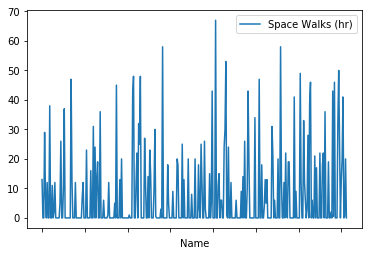

In [6]:
df.plot(x = "Name", y = "Space Walks (hr)")

### 2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

In [7]:
df['Alma Mater'].value_counts().idxmax()

'US Naval Academy'

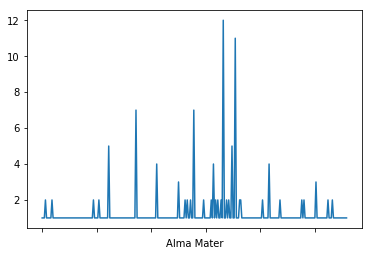

In [8]:
df.groupby(["Alma Mater"])["Name"].count().plot()

### 3. Определите количество военных и гражданских астронавтов.

In [9]:
sum(df['Military Rank'].isnull().values.ravel()) #количество гражданских

150

In [10]:
sum(df['Military Rank'].notnull().values.ravel()) #количество военных

207

### 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [11]:
df['Military Rank'].value_counts().idxmax()

'Colonel'

### 5. Определите количество женщин среди астронавтов

In [12]:
df[df['Gender']=='Female']['Gender'].count()

50

### 6. Удалите из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления.

In [13]:
len(df) # длина до удаления 

357

In [14]:
len(df.dropna(subset=['Graduate Major'])) # длина после удаления

298

### 7. Определите количество астронавтов, родом из Техаса. 

In [15]:
df[df['Birth Place'].str.contains('TX')]['Birth Place'].count()

23

### 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [16]:
df['Death Mission'].count() # так как строки, содержащие NaN не считаются. Если нет NaN, то космонавт погиб на миссии. 
# посчитать количество миссий, на которых никто не погиб можно sum(df['Death Mission'].isnull().values.ravel())

16

### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Оцените значение p-value.

In [30]:
from sklearn import preprocessing
from scipy import stats
le = preprocessing.LabelEncoder()
le.fit(df['Missions'].astype(str))
res = le.transform(df['Missions'].astype(str))

le = preprocessing.LabelEncoder()
le.fit(df['Gender'].astype(str))
res1 = le.transform(df['Gender'].astype(str))


p = stats.pearsonr(res, res1)

n = stats.spearmanr(res, res1)

if n > p:
    print ("Корреляция Спирмена больше Пирсона")
elif n == p:
    print ("Корреляция Спирмена ровна Пирсону")
else:
    print ("Корреляция Спирмена меньше Пирсона")

print(p)
print(n)


Корреляция Спирмена меньше Пирсона
(-0.06908093527697233, 0.19283968266544918)
SpearmanrResult(correlation=-0.0711238587245997, pvalue=0.1799752029202621)
